In [125]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import os

In [5]:
!ls data

sample_submission_V2.csv test_V2.csv              train_V2.csv


## Investigate

In [143]:
pd.set_option('display.max_columns', 500)

In [7]:
raw_train_data = pd.read_csv('./data/train_V2.csv')

In [8]:
raw_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [9]:
raw_train_datain_datain_datain_datain_datain_datain_datain_datain_datatrain_data_train_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [12]:
raw_train_data.describe().drop('count').T

,mean,std,min,25%,50%,75%,max
assists,0.233815,0.588573,0.0,0.0,0.0000,0.000000,22.0
boosts,1.106908,1.715794,0.0,0.0,0.0000,2.000000,33.0
damageDealt,130.717138,170.780621,0.0,0.0,84.2400,186.000000,6616.0
DBNOs,0.657876,1.145743,0.0,0.0,0.0000,1.000000,53.0
headshotKills,0.226820,0.602155,0.0,0.0,0.0000,0.000000,64.0
heals,1.370147,2.679982,0.0,0.0,0.0000,2.000000,80.0
killPlace,47.599350,27.462937,1.0,24.0,47.0000,71.000000,101.0
killPoints,505.006042,627.504896,0.0,0.0,0.0000,1172.000000,2170.0
kills,0.924783,1.558445,0.0,0.0,0.0000,1.000000,72.0
killStreaks,0.543955,0.710972,0.0,0.0,0.0000,1.000000,20.0


### Group Sizes

In [132]:
raw_train_data.loc[:, ['matchId', 'groupId', 'Id', 'winPlacePerc']].sort_values(by=['matchId', 'groupId', 'winPlacePerc']).head(25)

,matchId,groupId,Id,winPlacePerc
2639119,0000a43bce5eec,18b16ec699d8b6,023a9418cf67b0,0.3333
2843474,0000a43bce5eec,18b16ec699d8b6,6703bc191cff0a,0.3333
1425950,0000a43bce5eec,236ab9e9c081b9,5a3afae17b53c0,0.0370
1998699,0000a43bce5eec,236ab9e9c081b9,e431d8a8f6c99b,0.0370
2290792,0000a43bce5eec,236ab9e9c081b9,e7b325d63d8393,0.0370
3088817,0000a43bce5eec,236ab9e9c081b9,17f3544a0fdde4,0.0370
4131025,0000a43bce5eec,236ab9e9c081b9,3d96e46bfa404c,0.0370
4367296,0000a43bce5eec,236ab9e9c081b9,1845bd80ef1e31,0.0370
3599150,0000a43bce5eec,3a6addfa0df938,fc62a751955351,0.0000
3895898,0000a43bce5eec,3a6addfa0df938,7ad5883d71d42e,0.0000


In [141]:
grouped_train_data = raw_train_data.groupby(['matchId', 'groupId','matchType']).size().reset_index(name='groupSize')

In [142]:
grouped_train_data[grouped_train_data['groupSize'] > 50]

,matchId,groupId,matchType,groupSize
486895,3e029737889ce9,b8275198faa03b,duo-fpp,72
516661,41a634f62f86b7,128b07271aa012,solo-fpp,64
1416592,b30f3d87189aa6,14d6b54cdec6bc,normal-squad-fpp,74


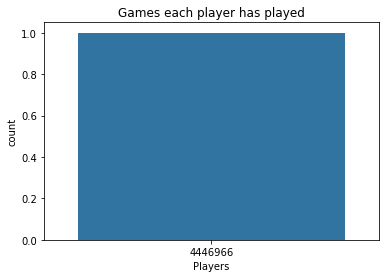

In [85]:
data = (raw_train_data
 .groupby(by='Id', as_index=False).size().reset_index(name='NumOfGames')
 .groupby(by='NumOfGames', as_index=False).size().reset_index(name='Players')
)
plt.figure()
sns.countplot(data['Players'].astype('str').sort_values())
plt.title("Games each player has played",fontsize=12)
plt.show()

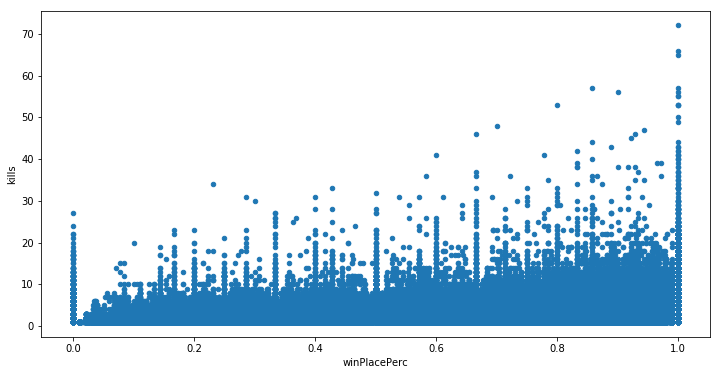

In [127]:
raw_train_data[raw_train_data['kills'] > 0].plot.scatter(x='winPlacePerc', y='kills', figsize=(12, 6))

In [160]:
raw_train_data[raw_train_data['matchId'] == '41a634f62f86b7']

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
29680,747a410b07a1a0,128b07271aa012,41a634f62f86b7,0,0,100.00,0,0,0,18,0,1,1,40.020,1044,solo-fpp,97,34,1702,0,0.0,0,0.0,0,0,79.95,2,0,0.2812
61381,4d23e469ca2f13,128b07271aa012,41a634f62f86b7,0,0,0.00,0,0,0,41,0,0,0,0.000,1044,solo-fpp,97,34,1711,0,0.0,0,0.0,0,0,619.00,0,0,0.2812
72990,7c781cd3927554,128b07271aa012,41a634f62f86b7,0,0,23.50,0,0,1,11,0,1,1,12.500,1044,solo-fpp,97,34,1499,0,0.0,0,0.0,0,0,116.40,4,0,0.2812
119749,058ec2659e12c5,128b07271aa012,41a634f62f86b7,0,0,0.00,0,0,0,59,0,0,0,0.000,1044,solo-fpp,97,34,1712,0,0.0,0,0.0,0,0,153.10,3,0,0.2812
132197,545e23506cbe41,128b07271aa012,41a634f62f86b7,0,0,0.00,0,0,0,43,0,0,0,0.000,1044,solo-fpp,97,34,1629,0,0.0,0,0.0,0,0,48.45,2,0,0.2812
137222,fbe28e58aca080,ec78ad2bb19110,41a634f62f86b7,1,0,43.00,0,0,0,82,0,0,0,0.000,1044,solo-fpp,97,34,1536,0,0.0,0,0.0,0,0,41.37,1,0,0.1771
252920,750ad651459b54,128b07271aa012,41a634f62f86b7,0,0,41.85,0,0,0,37,0,0,0,0.000,1044,solo-fpp,97,34,1626,0,0.0,0,0.0,0,0,33.03,1,0,0.2812
257403,5fe55e7e7adc53,27930d951243df,41a634f62f86b7,0,0,0.00,0,0,0,94,0,0,0,0.000,1044,solo-fpp,97,34,1599,0,0.0,0,0.0,0,0,0.00,2,0,0.0312
284293,38c7c81d3360bc,0c33ad03fdb940,41a634f62f86b7,0,0,51.70,0,0,0,83,0,0,0,0.000,1044,solo-fpp,97,34,1500,0,0.0,0,0.0,0,0,26.65,1,0,0.1667
302076,e27590d71a4c20,128b07271aa012,41a634f62f86b7,0,0,100.00,0,0,0,14,0,1,1,24.070,1044,solo-fpp,97,34,1500,0,0.0,0,0.0,0,0,33.19,1,0,0.2812


### Match Types
Find all the match types. Understand the different game modes: https://pubg.gamepedia.com/Game_Modes

In [178]:
raw_train_data.matchType.unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [177]:
(raw_train_data
 .groupby(by='matchType', as_index=False)
 .size()
 .reset_index(name='count')
 .sort_values(by=['matchType'], ascending=False)
)

,matchType,count
15,squad-fpp,1756186
14,squad,626526
13,solo-fpp,536762
12,solo,181943
11,normal-squad-fpp,17174
10,normal-squad,516
9,normal-solo-fpp,1682
8,normal-solo,326
7,normal-duo-fpp,5489
6,normal-duo,199


## Feature Engineering

### Standardize match types

In [213]:
def get_match_type_mode(match_type):
    custom_modes = ['crashfpp', 'flaretpp', 'flarefpp', 'crashtpp']
    mode = None
    if match_type in custom_modes:
        mode = 'custom'
    elif 'solo' in match_type:
        mode = 'solo'
    elif 'duo' in match_type:
        mode = 'duo'
    elif 'squad' in match_type:
        mode = 'squad'
    else:
        mode = 'unknown'
    return mode

def get_match_type_perspective(match_type):
    return 'fpp' if 'fpp' in match_type else 'tpp'

def standardize_match_type(data):
    match_type_mode_data = raw_train_data.matchType.apply(get_match_type_mode)
    match_type_perspective_data = raw_train_data.matchType.apply(get_match_type_perspective)
    standardize_match_type_data = pd.concat([match_type_mode_data, match_type_perspective_data], axis=1)
    standardize_match_type_data.columns = ['matchTypeMode', 'matchTypePerspective']
    return standardize_match_type_data

train_data = pd.concat([raw_train_data, standardize_match_type(raw_train_data)], axis=1)
train_data.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,matchTypeMode,matchTypePerspective
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,squad,fpp
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,squad,fpp
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755,duo,tpp
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667,squad,fpp
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875,solo,fpp
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,0,1,1,18.44,1395,squad-fpp,28,28,1418,0,0.0000,0,0.00,0,0,34.70,1,0,0.0370,squad,fpp
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,1262,0,0,0.00,1316,squad-fpp,28,28,-1,0,0.0000,0,0.00,0,0,13.50,1,1497,0.0000,squad,fpp
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,1000,0,0,0.00,1967,solo-fpp,96,92,-1,0,2004.0000,0,0.00,0,0,1089.00,6,1500,0.7368,solo,fpp
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,0,0,0,0.00,1375,squad,28,27,1493,0,0.0000,0,0.00,0,0,799.90,4,0,0.3704,squad,tpp
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,0,0,0,0.00,1930,squad,29,27,1349,0,0.0000,0,0.00,0,0,65.67,1,0,0.2143,squad,tpp


In [214]:
features = list(train_data.drop(['Id', 'matchId', 'groupId', 'matchType', 'matchTypeMode', 'matchTypePerspective'], axis=1).columns)
features

['assists',
 'boosts',
 'damageDealt',
 'DBNOs',
 'headshotKills',
 'heals',
 'killPlace',
 'killPoints',
 'kills',
 'killStreaks',
 'longestKill',
 'matchDuration',
 'maxPlace',
 'numGroups',
 'rankPoints',
 'revives',
 'rideDistance',
 'roadKills',
 'swimDistance',
 'teamKills',
 'vehicleDestroys',
 'walkDistance',
 'weaponsAcquired',
 'winPoints',
 'winPlacePerc']

### Aggregate features

Teams are more important than single players. Final players' scores are directly influenced by their team total effort. Therefore, we will strive to group together groups stats. 

A group is not a team. Teams with the same score are clamped into single groups. For that reason, we find groups with multiple players (e.g. over the limit according to the match type).

In [215]:
AGGS = {}
for feature in features:
    AGGS[feature] = ['count', 'mean'] if feature in ['winPlacePerc'] else ['mean', 'std', 'max', 'min']
        
def get_groups_data(data, aggs=AGGS):
    return data.groupby(['matchId', 'groupId', 'matchType', 'matchTypeMode', 'matchTypePerspective'], as_index=False).agg(aggs)
    

agg_train_data = get_groups_data(train_data)
agg_train_data.head(5)

matchId         groupId  matchType matchTypeMode  \
                                                             
0  0000a43bce5eec  18b16ec699d8b6  squad-fpp         squad   
1  0000a43bce5eec  236ab9e9c081b9  squad-fpp         squad   
2  0000a43bce5eec  3a6addfa0df938  squad-fpp         squad   
3  0000a43bce5eec  4bf06994bd4c9a  squad-fpp         squad   
4  0000a43bce5eec  4d1bbbc19b9084  squad-fpp         squad   

  matchTypePerspective assists              boosts                    \
                          mean  std max min   mean       std max min   
0                  fpp     0.0  0.0   0   0    0.5  0.707107   1   0   
1                  fpp     0.0  0.0   0   0    0.0  0.000000   0   0   
2                  fpp     0.0  0.0   0   0    0.0  0.000000   0   0   
3                  fpp     0.0  0.0   0   0    0.5  0.707107   1   0   
4                  fpp     1.0  0.0   1   1    3.5  0.707107   4   3   

  damageDealt                                DBNOs                    \
         mean         std    max     min      mean       std max min   
0  109.675000  127.738840  200.0   19.35  1.000000  1.414214   2   0   
1   47.988333   48.957148  121.3    0.00  0.333333  0.816497   2   0   
2    0.000000    0.000000    0.0    0.00  0.000000  0.000000   0   0   
3   11.700000   16.546299   23.4    0.00  0.000000  0.000000   0   0   
4  340.950000  267.498495  530.1  151.80  2.500000  2.121320   4   1   

  headshotKills              heals                   killPlace                 \
           mean  std max min  mean       std max min      mean        std max   
0           0.0  0.0   0   0   0.5  0.707107   1   0      41.0  28.284271  61   
1           0.0  0.0   0   0   0.0  0.000000   0   0      90.5   1.870829  93   
2           0.0  0.0   0   0   0.0  0.000000   0   0      94.5   0.707107  95   
3           0.0  0.0   0   0   0.0  0.000000   0   0      59.5   0.707107  60   
4           1.0  0.0   1   1   1.0  1.414214   2   0      14.0  12.727922  23   

      killPoints                         kills                   killStreaks  \
  min       mean         std   max   min  mean       std max min        mean   
0  21     1242.0  250.315801  1419  1065   1.0  1.414214   2   0         0.5   
1  88     1355.5   99.488190  1470  1244   0.0  0.000000   0   0         0.0   
2  94     1382.0  107.480231  1458  1306   0.0  0.000000   0   0         0.0   
3  59     1178.0   15.556349  1189  1167   0.0  0.000000   0   0         0.0   
4   5     1504.0  277.185858  1700  1308   3.0  2.828427   5   1         1.5   

                    longestKill                          matchDuration       \
        std max min        mean        std    max    min          mean  std   
0  0.707107   1   0       6.275   8.874190  12.55   0.00          1346  0.0   
1  0.000000   0   0       0.000   0.000000   0.00   0.00          1346  0.0   
2  0.000000   0   0       0.000   0.000000   0.00   0.00          1346  0.0   
3  0.000000   0   0       0.000   0.000000   0.00   0.00          1346  0.0   
4  0.707107   2   1      25.230  11.582409  33.42  17.04          1346  0.0   

              maxPlace              numGroups              rankPoints       \
    max   min     mean  std max min      mean  std max min       mean  std   
0  1346  1346       28  0.0  28  28        28  0.0  28  28        0.0  0.0   
1  1346  1346       28  0.0  28  28        28  0.0  28  28        0.0  0.0   
2  1346  1346       28  0.0  28  28        28  0.0  28  28        0.0  0.0   
3  1346  1346       28  0.0  28  28        28  0.0  28  28        0.0  0.0   
4  1346  1346       28  0.0  28  28        28  0.0  28  28        0.0  0.0   

          revives              rideDistance                            \
  max min    mean  std max min         mean         std    max    min   
0   0   0     0.0  0.0   0   0        0.000    0.000000    0.0  0.000   
1   0   0     0.0  0.0   0   0        0.000    0.000000    0.0  0.000   
2   0   0     0.0  0.0   0   0        0.000

Flatten columns:

In [217]:
agg_train_data.columns = ['_'.join(t).rstrip('_') if t != ('winPlacePerc', 'count') else 'groupSize'  for t in agg_train_data.columns.values]
agg_train_data.head(10)

,matchId,groupId,matchType,matchTypeMode,matchTypePerspective,assists_mean,assists_std,assists_max,assists_min,boosts_mean,boosts_std,boosts_max,boosts_min,damageDealt_mean,damageDealt_std,damageDealt_max,damageDealt_min,DBNOs_mean,DBNOs_std,DBNOs_max,DBNOs_min,headshotKills_mean,headshotKills_std,headshotKills_max,headshotKills_min,heals_mean,heals_std,heals_max,heals_min,killPlace_mean,killPlace_std,killPlace_max,killPlace_min,killPoints_mean,killPoints_std,killPoints_max,killPoints_min,kills_mean,kills_std,kills_max,kills_min,killStreaks_mean,killStreaks_std,killStreaks_max,killStreaks_min,longestKill_mean,longestKill_std,longestKill_max,longestKill_min,matchDuration_mean,matchDuration_std,matchDuration_max,matchDuration_min,maxPlace_mean,maxPlace_std,maxPlace_max,maxPlace_min,numGroups_mean,numGroups_std,numGroups_max,numGroups_min,rankPoints_mean,rankPoints_std,rankPoints_max,rankPoints_min,revives_mean,revives_std,revives_max,revives_min,rideDistance_mean,rideDistance_std,rideDistance_max,rideDistance_min,roadKills_mean,roadKills_std,roadKills_max,roadKills_min,swimDistance_mean,swimDistance_std,swimDistance_max,swimDistance_min,teamKills_mean,teamKills_std,teamKills_max,teamKills_min,vehicleDestroys_mean,vehicleDestroys_std,vehicleDestroys_max,vehicleDestroys_min,walkDistance_mean,walkDistance_std,walkDistance_max,walkDistance_min,weaponsAcquired_mean,weaponsAcquired_std,weaponsAcquired_max,weaponsAcquired_min,winPoints_mean,winPoints_std,winPoints_max,winPoints_min,groupSize,winPlacePerc_mean
0,0000a43bce5eec,18b16ec699d8b6,squad-fpp,squad,fpp,0.000000,0.000000,0,0,0.500000,0.707107,1,0,109.675000,127.738840,200.00,19.35,1.000000,1.414214,2,0,0.000000,0.00000,0,0,0.50,0.707107,1,0,41.0,28.284271,61,21,1242.000000,250.315801,1419,1065,1.000000,1.414214,2,0,0.50,0.707107,1,0,6.275000,8.874190,12.550,0.00,1346,0.0,1346,1346,28,0.0,28,28,28,0.0,28,28,0.0,0.0,0,0,0.00,0.00000,0,0,0.0000,0.000000,0.0,0.000,0.0,0.0,0,0,0.000000,0.000000,0.000,0.000,0.0,0.0,0,0,0.00,0.0,0,0,131.685000,81.621336,189.400,73.97,1.000000,0.000000,1,1,1479.000000,7.071068,1484,1474,2,0.3333
1,0000a43bce5eec,236ab9e9c081b9,squad-fpp,squad,fpp,0.000000,0.000000,0,0,0.000000,0.000000,0,0,47.988333,48.957148,121.30,0.00,0.333333,0.816497,2,0,0.000000,0.00000,0,0,0.00,0.000000,0,0,90.5,1.870829,93,88,1355.500000,99.488190,1470,1244,0.000000,0.000000,0,0,0.00,0.000000,0,0,0.000000,0.000000,0.000,0.00,1346,0.0,1346,1346,28,0.0,28,28,28,0.0,28,28,0.0,0.0,0,0,0.00,0.00000,0,0,0.0000,0.000000,0.0,0.000,0.0,0.0,0,0,0.000000,0.000000,0.000,0.000,0.0,0.0,0,0,0.00,0.0,0,0,19.931833,19.691803,56.160,0.00,0.833333,0.408248,1,0,1464.000000,51.013724,1547,1411,6,0.0370
2,0000a43bce5eec,3a6addfa0df938,squad-fpp,squad,fpp,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0,0,0.000000,0.00000,0,0,0.00,0.000000,0,0,94.5,0.707107,95,94,1382.000000,107.480231,1458,1306,0.000000,0.000000,0,0,0.00,0.000000,0,0,0.000000,0.000000,0.000,0.00,1346,0.0,1346,1346,28,0.0,28,28,28,0.0,28,28,0.0,0.0,0,0,0.00,0.00000,0,0,0.0000,0.000000,0.0,0.000,0.0,0.0,0,0,0.000000,0.000000,0.000,0.000,0.0,0.0,0,0,0.00,0.0,0,0,4.818000,6.813681,9.636,0.00,0.500000,0.707107,1,0,1485.000000,101.823376,1557,1413,2,0.0000
3,0000a43bce5eec,4bf06994bd4c9a,squad-fpp,squad,fpp,0.000000,0.000000,0,0,0.500000,0.707107,1,0,11.700000,16.546299,23.40,0.00,0.000000,0.000000,0,0,0.000000,0.00000,0,0,0.00,0.000000,0,0,59.5,0.707107,60,59,1178.000000,15.556349,1189,1167,0.000000,0.000000,0,0,0.00,0.000000,0,0,0.000000,0.000000,0.000,0.00,1346,0.0,1346,1346,28,0.0,28,28,28,0.0,28,28,0.0,0.0,0,0,0.00,0.00000,0,0,0.0000,0.000000,0.0,0.000,0.0,0.0,0,0,0.000000,0.000000,0.000,0.000,0.0,0.0,0,0,0.00,0.0,0,0,559.050000,298.894036,770.400,347.70,7.000000,7.071068,12,2,1458.000000,35.355339,1483,1433,2,0.3704
4,0000a43bce5eec,4d1bbbc19b9084,squad-fpp,squad,fpp,1.000000,0.000000,1,1,3.500000,0.707107,4,3,340.950000,267.498495,530.10,151.80,2.500000,2.121320,4,1,1.000000,0.00000,1,1,1.0

Remove null values:

In [219]:
agg_train_data.notnull().count(axis=1)
train_data.fillna(value=0, inplace=True)
agg_train_data.notnull().count(axis=1)

0          103
1          103
2          103
3          103
4          103
5          103
6          103
7          103
8          103
9          103
10         103
11         103
12         103
13         103
14         103
15         103
16         103
17         103
18         103
19         103
20         103
21         103
22         103
23         103
24         103
25         103
26         103
27         103
28         103
29         103
          ... 
2026715    103
2026716    103
2026717    103
2026718    103
2026719    103
2026720    103
2026721    103
2026722    103
2026723    103
2026724    103
2026725    103
2026726    103
2026727    103
2026728    103
2026729    103
2026730    103
2026731    103
2026732    103
2026733    103
2026734    103
2026735    103
2026736    103
2026737    103
2026738    103
2026739    103
2026740    103
2026741    103
2026742    103
2026743    103
2026744    103
Length: 2026745, dtype: int64

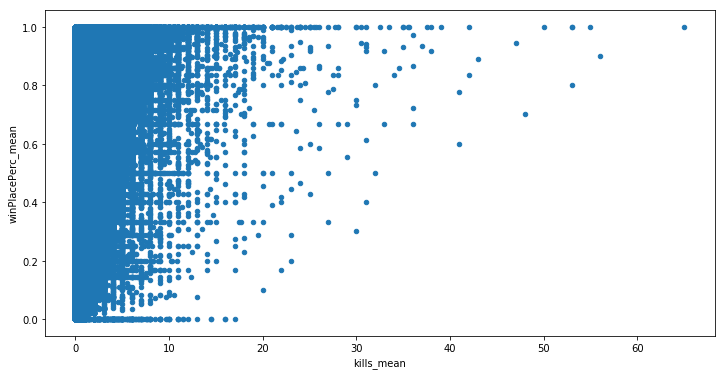

In [221]:
agg_train_data.plot.scatter(x='kills_mean', y='winPlacePerc_mean', figsize=(12, 6))

### Categorize features

In [222]:
agg_train_data.columns

Index(['matchId', 'groupId', 'matchType', 'matchTypeMode',
       'matchTypePerspective', 'assists_mean', 'assists_std', 'assists_max',
       'assists_min', 'boosts_mean',
       ...
       'weaponsAcquired_mean', 'weaponsAcquired_std', 'weaponsAcquired_max',
       'weaponsAcquired_min', 'winPoints_mean', 'winPoints_std',
       'winPoints_max', 'winPoints_min', 'groupSize', 'winPlacePerc_mean'],
      dtype='object', length=103)

In [ ]:
cat_column = ['matchTypeMode', 'matchTypePerspective']

### Prepare inputs

In [196]:
def get_data(data, target='winPlacePerc_mean'):
    X = np.array(data.loc[:, data.columns != target])
    y = np.array(data[target])
    return X, y

X_train, y_train = get_data(train_data)

In [197]:
y_train

array([0.3333, 0.037 , 0.    , ..., 0.    , 0.25  , 0.4643])

### Normalize input

In [124]:
scaler = preprocessing.MinMaxScaler()
X_train = scaler.transform(X_train)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


## The model

In [ ]:
N, dim = X_train.shape
model = nn.Sequential(
    nn.BatchNorm1d()
    nn.Linear(in_features=dim, out_features=128),
    nn.ReLU(),
    nn.BatchNorm1d(128),
    nn.Dropout(p=0.3),
    nn.Linear(in_features=128, out_features=64),
    nn.ReLU(),
    nn.BatchNorm1d(64),
    nn.Dropout(p=0.3),
    nn.Linear(in_features=64, out_features=1)                     
)

### Train and predict

In [ ]:

tensor_X_train = torch.from_numpy(X_train)
tensor_y_train = torch.from_numpy(y_train)

train_dataset = torch.utils.data.TensorDataset(tensor_X_train, tensor_y_train) # create your datset
train_loader = utils.DataLoader(my_dataset) # create your dataloader

In [ ]:
criterion = nn.MSELoss()
lr = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [ ]:
epochs = 30

for epoch in rage(epochs):
    running_loss = 0
    for inputs, scores in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, scores)
        loss.backword()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        print(f"Training loss: {running_loss/len(train_loader)}")